In [30]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [31]:
#IMPORTANDO BASE DE DADOS
df = pd.read_csv('dados_produtos.csv')
df.head()


,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [32]:
#ANALISE DOS TIPOS/QUANTIDADE DE DADOS
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


Text(0, 0.5, 'Notas')

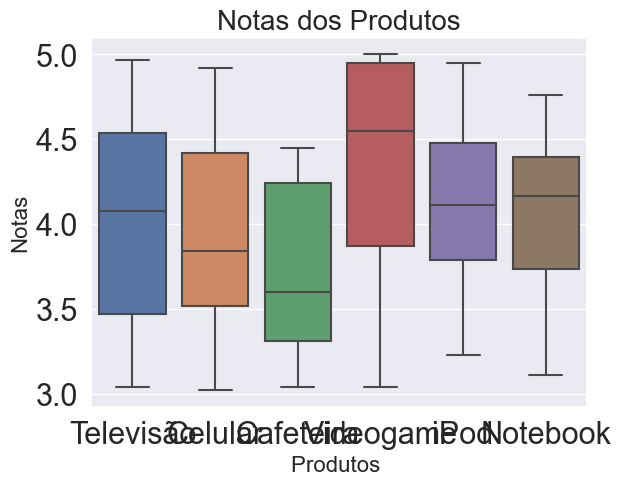

In [33]:
#ANÁLISE UTILIZANDO BOXPLOT, P/ VERIFICAR OUTLIERS
sns.boxplot(y=df['rating'], x=df['product_name'])
sns.set(font_scale = 2)
plt.title('Notas dos Produtos', fontsize = 20)
plt.xlabel('Produtos ', fontsize = 16)
plt.ylabel('Notas', fontsize = 16)

In [34]:
#retorna valores nulos
df.isnull()

,product_name,rating,rating_count,purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [35]:
#TRANSFORMANDO A COLUNA purchased EM VARIAVEL CATEGÓRICA
purchased = {0 : 'Não Comprou', 1 : 'Comprou'}
df = df.replace({'purchased' : purchased})
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,Comprou
1,Celular,3.46,3872,Não Comprou
2,Cafeteira,3.25,1187,Não Comprou
3,Televisão,3.77,4097,Comprou
4,Videogame,5.00,4738,Comprou


In [36]:
compra = df['purchased']
produto = df['product_name']
nota = df['rating']
notaGeral = df['rating_count']
notas = nota.array
compras = compra.array
produto = produto.array





In [37]:
notas_treino, notas_teste, compra_treino, compra_teste = train_test_split(notas.reshape(-1,1), compras.reshape(-1,1), test_size = 0.2, random_state= 42) # reshape, organizar o dataframe 



In [38]:
#isntanciando o modelo
modelo = DecisionTreeClassifier()

#treinando o modelo
modelo.fit(notas_treino, compra_treino)

DecisionTreeClassifier()

[Text(0.8536585365853658, 0.98, '3.04 <= 4.98\ngini = 0.5\nsamples = 80\nvalue = [40, 40]\nclass = Comprou'),
 Text(0.8211382113821138, 0.94, '3.04 <= 4.93\ngini = 0.5\nsamples = 78\nvalue = [38, 40]\nclass = Não Comprou'),
 Text(0.7398373983739838, 0.9, '3.04 <= 4.77\ngini = 0.5\nsamples = 73\nvalue = [37, 36]\nclass = Comprou'),
 Text(0.6747967479674797, 0.86, '3.04 <= 4.665\ngini = 0.499\nsamples = 67\nvalue = [32, 35]\nclass = Não Comprou'),
 Text(0.6422764227642277, 0.82, '3.04 <= 4.455\ngini = 0.499\nsamples = 62\nvalue = [32, 30]\nclass = Comprou'),
 Text(0.6097560975609756, 0.78, '3.04 <= 3.96\ngini = 0.497\nsamples = 56\nvalue = [26, 30]\nclass = Não Comprou'),
 Text(0.43902439024390244, 0.74, '3.04 <= 3.765\ngini = 0.494\nsamples = 36\nvalue = [20, 16]\nclass = Comprou'),
 Text(0.35772357723577236, 0.7, '3.04 <= 3.695\ngini = 0.497\nsamples = 28\nvalue = [13, 15]\nclass = Não Comprou'),
 Text(0.2926829268292683, 0.66, '3.04 <= 3.515\ngini = 0.499\nsamples = 23\nvalue = [12, 1

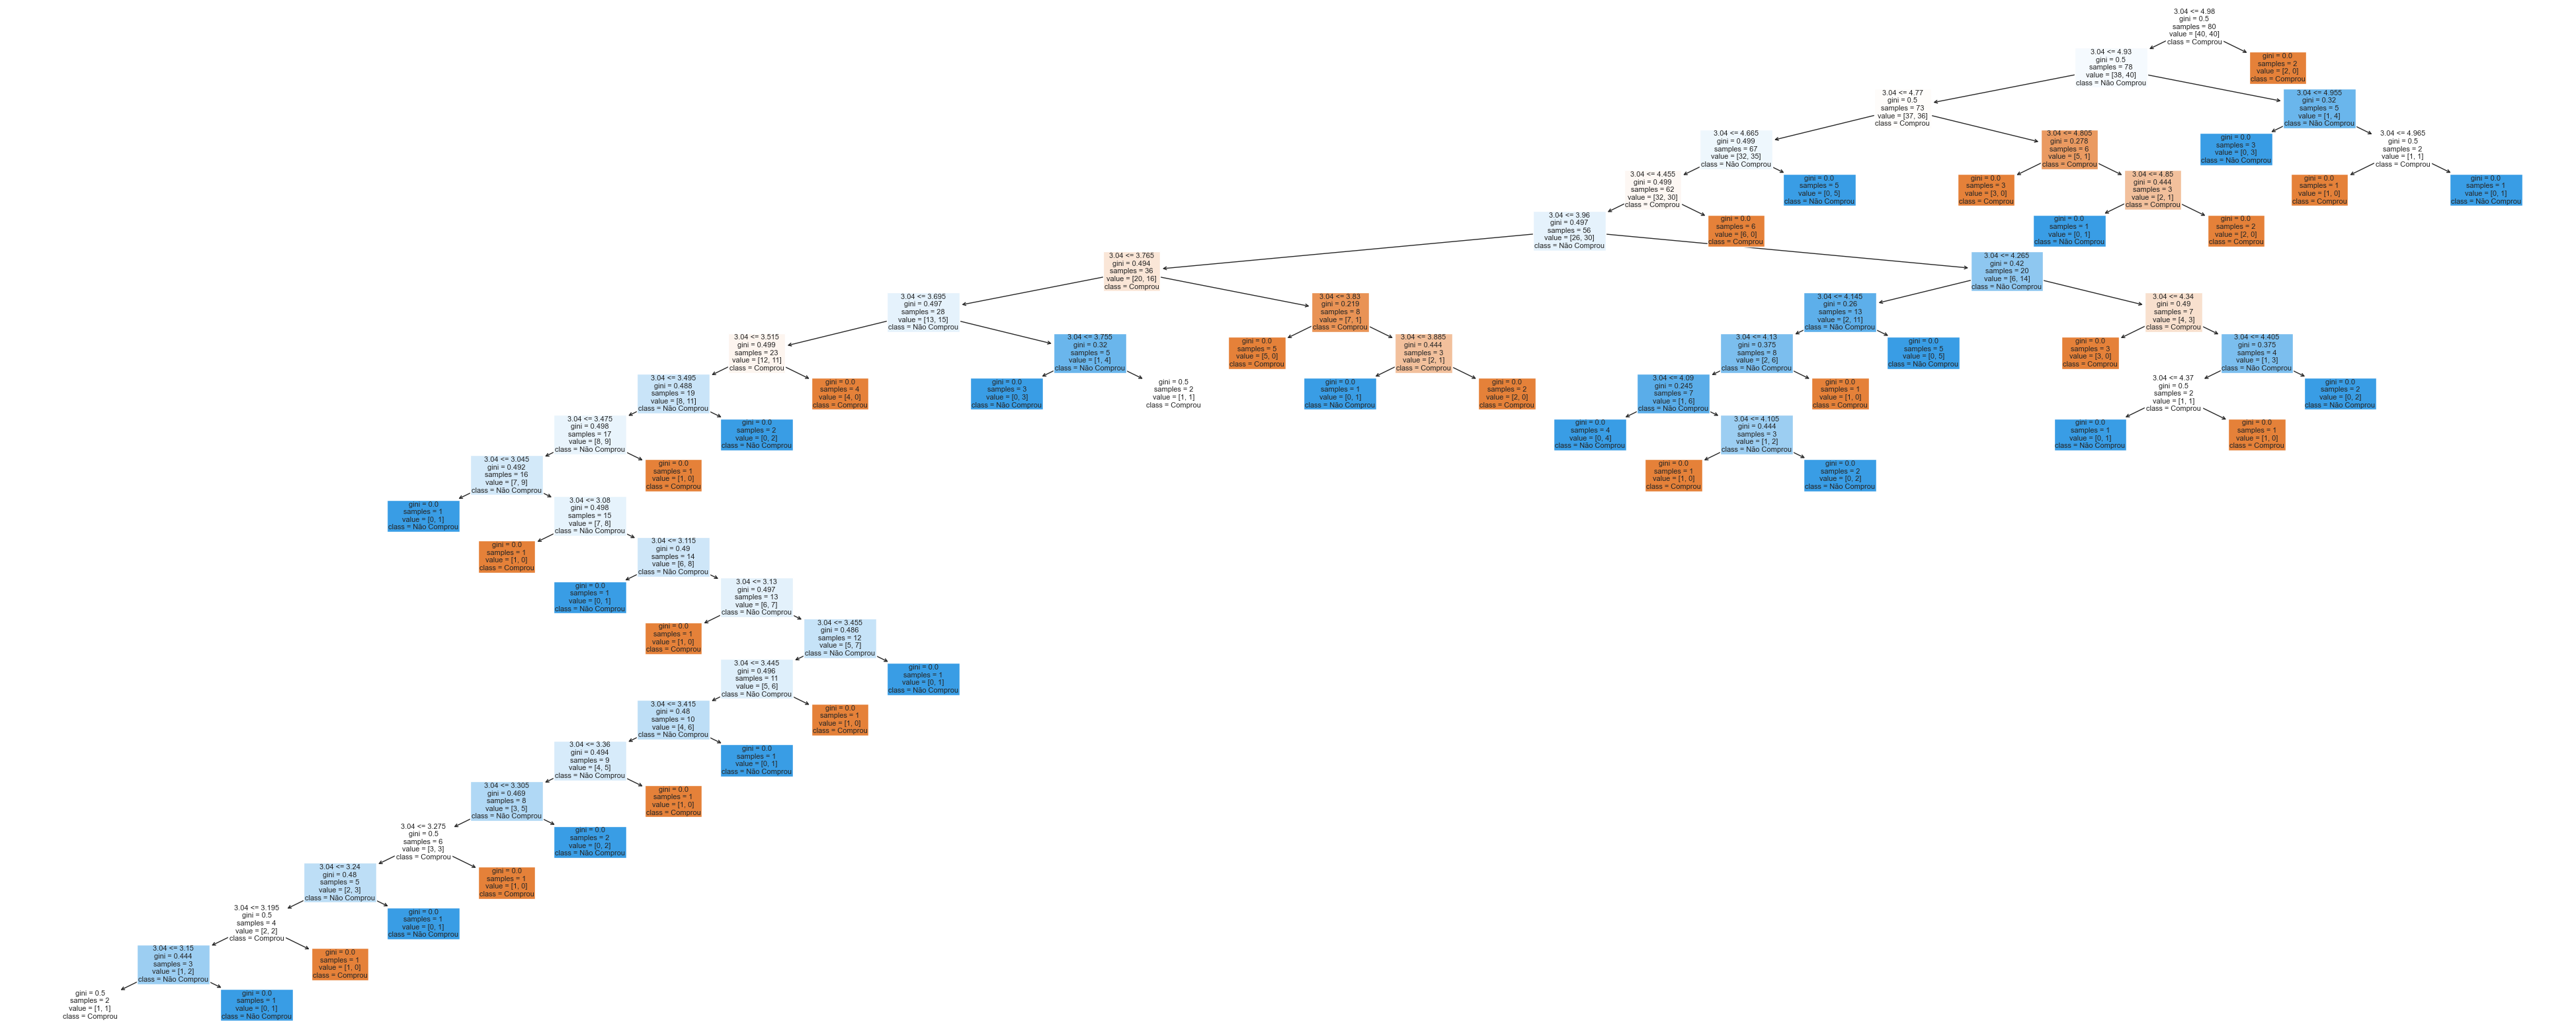

In [39]:
#PLOTANDO A ARVORE DE DECISÃO
fig= plt.figure(figsize=(50,20))
tree.plot_tree(modelo, feature_names = notas.tolist(), class_names=compras.tolist(), filled=True)